<a href="https://colab.research.google.com/github/tec03/ParaAssignment01-/blob/main/assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad 6 Visualización

Juan Pablo Bladinieres Martin del Campo A01793474

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

1.- Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. 

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [4]:
path='https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df = pd.read_csv(path)

2.- Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [5]:
df.shape 

(30000, 25)

In [6]:
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [7]:
df.head(3)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0


In [8]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [10]:
df.isna()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


3.- Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [11]:
df.dropna(inplace=True)
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


4.- Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [12]:
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


5.- Realiza el conteo de las variables categóricas

Las variables categoricas son :
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 

In [13]:
print(df.X2.value_counts())
print(df.X3.value_counts())
print(df.X4.value_counts())

2.0    18095
1.0    11863
Name: X2, dtype: int64
2.0    14009
1.0    10572
3.0     4909
5.0      280
4.0      123
6.0       51
0.0       14
Name: X3, dtype: int64
2.0    15939
1.0    13643
3.0      322
0.0       54
Name: X4, dtype: int64


6.- Escala los datos, si consideras necesario

In [14]:
df['X67891011'] = df['X6'] + df['X7'] + df['X8'] + df['X9'] + df['X10'] + df['X11']
df['X121314151617'] = df['X12'] + df['X13'] + df['X14'] + df['X15'] + df['X16'] + df['X17']
df['X181920212223'] = df['X18'] + df['X19'] + df['X20'] + df['X21'] + df['X22'] + df['X23']
df2=df.copy()
df2.drop(columns=['X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23'],inplace=True)
df2
X=df2[['ID','X1','X2','X3','X4','X5','X67891011','X121314151617','X181920212223']]
y=df2['Y']

<AxesSubplot: >

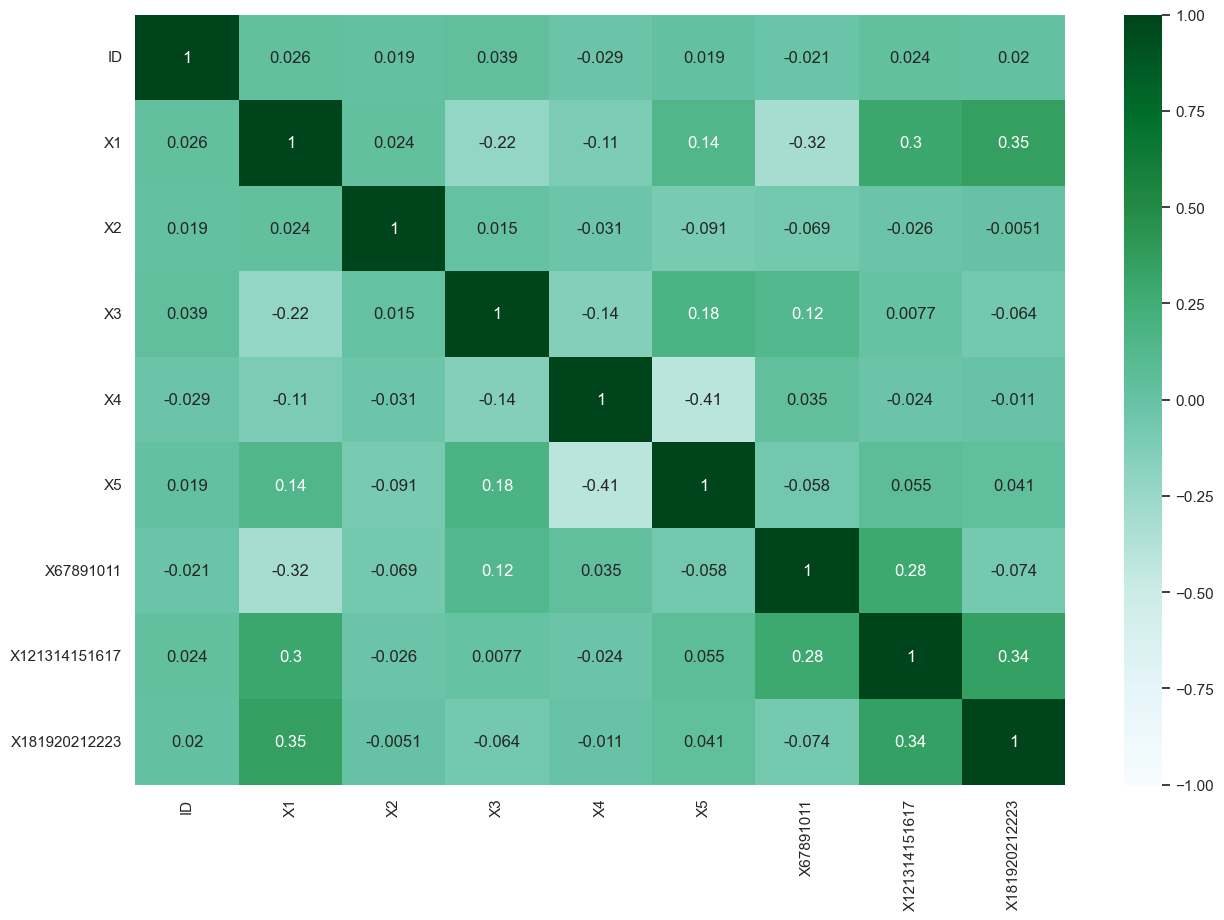

In [15]:
corrs=X.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(corrs, vmin=-1, vmax= 1, cmap="BuGn", annot= True)

In [16]:
numerical=['ID','X1','X5','X67891011','X121314151617','X181920212223']
categorical = ['X2','X3','X4']

my_pipe_num=Pipeline(steps = [('imputar', SimpleImputer(strategy='median')),  
                                        ('scalar', MinMaxScaler(feature_range=(1, 2))),
                                        ('sqrt', FunctionTransformer(np.sqrt))
                                        ]) 

my_pipe_cat=Pipeline(steps = [('imputar', SimpleImputer(strategy='most_frequent')), 
                                        ('one_hot', OneHotEncoder())
                                        ])      

columnasTransformer = ColumnTransformer(transformers = [('numerical', my_pipe_num, numerical), ('categorical',my_pipe_cat,categorical)],
                                        remainder='passthrough')

7.- Reduce las dimensiones con PCA, si consideras necesario.
- Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
- Indica la importancia de las variables en cada componente


In [17]:

pcs = PCA(n_components=9)

cols=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']
colsx=['ID','X1','X5','X67891011','X121314151617','X181920212223','X21','X22','X30','X31','X32','X33','X34','X35','X36','X40','X41','X42','X43']

pipe = Pipeline(steps=[
      ('preprocessor', columnasTransformer), 
      ('pca', pcs)
  ])

pipe.fit(X)

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                          }
                          )
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

pcsSummary.columns = cols
pcsSummary = pcsSummary.round(2)

pcsCompsDf = pd.DataFrame(pcs.components_.transpose(),
                         columns=pcsSummary.columns,
                         index=colsx
)
pcsCompsDf.iloc[:,:5]
print(pcsCompsDf.PC1.abs().nlargest(3))
print(pcsCompsDf.PC2.abs().nlargest(3))
print(pcsCompsDf.PC3.abs().nlargest(3))
print(pcsCompsDf.PC4.abs().nlargest(3))
print(pcsCompsDf.PC5.abs().nlargest(3))
print(pcsCompsDf.PC6.abs().nlargest(3))
print(pcsCompsDf.PC7.abs().nlargest(3))
print(pcsCompsDf.PC8.abs().nlargest(3))
print(pcsCompsDf.PC9.abs().nlargest(3))

pcsSummary


X42    0.599701
X41    0.596595
X31    0.308473
Name: PC1, dtype: float64
X21    0.659974
X22    0.659974
X42    0.241985
Name: PC2, dtype: float64
X32    0.712433
X31    0.572391
X41    0.267551
Name: PC3, dtype: float64
X33    0.795460
X31    0.487967
X32    0.322450
Name: PC4, dtype: float64
X43    0.791840
X41    0.420954
X42    0.419779
Name: PC5, dtype: float64
ID     0.929396
X35    0.272896
X33    0.129199
Name: PC6, dtype: float64
X35    0.751401
ID     0.348872
X33    0.320655
Name: PC7, dtype: float64
X34    0.836203
X35    0.394181
X31    0.189302
Name: PC8, dtype: float64
X1           0.633183
X5           0.609237
X67891011    0.439171
Name: PC9, dtype: float64


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Standard deviation,0.73,0.69,0.62,0.44,0.13,0.12,0.11,0.07,0.07
Proportion of variance,0.32,0.29,0.23,0.12,0.01,0.01,0.01,0.00,0.00
Cumulative proportion,0.32,0.61,0.84,0.96,0.97,0.98,0.99,0.99,0.99


8.- Elabora los histogramas de los atributos para visualizar su distribución

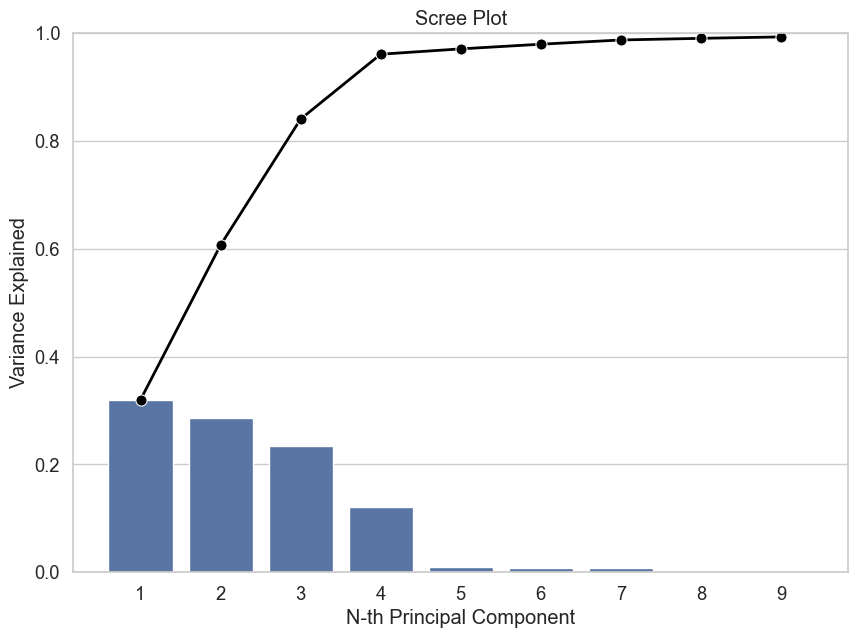

In [18]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

9.- Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

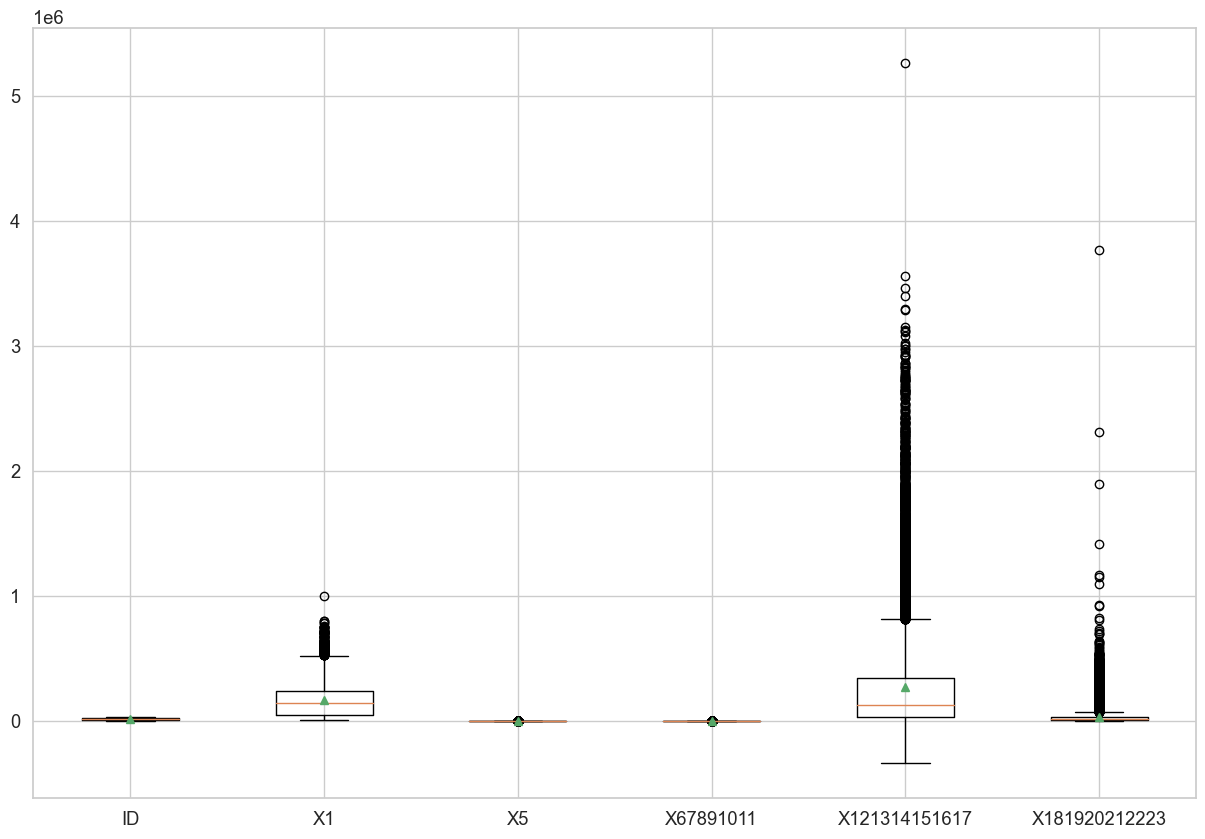

In [20]:
# grafica de caja y bigote para los datos numericos recortados
plt.boxplot(X[numerical], labels=X[numerical].columns, showmeans=True)
plt.show()

10.- Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

Es necesario revisar cada variable pero de acuerdo con el PCA con los primeros 3 componentes se encuentra la mayoria de los datos por lo que es recomendado utilizar el PCA 1, 2 y 3, tanto el heatmap como el de distribución nos dicen la correlación de las variables X4 y X2 y X5 en este caso es necesario revisar si las catergorias estan teniendi una distribución injusta y ajustar los datos. La grafica de caja y bigote es interesante pero no nos ayuda a revisar como se dislumbran los datos por lo tanto no es muy util. se podria utilizar para revisar por que se muestran como datos excedentes en nuestras variables agrupadas.